## Predicting Piano Fingerings Using Machine Learning: A Comparison of Random Forest, Recurrent Neural Network (RNN) and a Long Short-Term Memory (LSTM) network

### ABSTRACT

This project leverages machine learning to predict piano fingering for musical scores. Automating the process of piano fingering generation can enhance music learning and performance, offering optimal finger placement recommendations for new sheet music. In this project, we process real-world annotated piano scores in MusicXML (MXL) format and apply Random Forest and k-Nearest Neighbors (KNN) algorithms to capture the complex patterns of piano finger movements. We evaluate the models' accuracy in predicting fingerings for unseen musical notes, aiming to identify the most effective algorithm for generating efficient recommendations.

## INTRODUCTION

Determining the optimal piano fingering for a given score is a complex task, influenced by a combination of musical, physiological, and stylistic factors. Current solutions typically rely on manual annotation, which can be time-consuming and prone to inconsistency. This project aims to automate fingering prediction using machine learning techniques, providing a valuable tool for learners, educators, and composers.

The data preparation process involved parsing publicly available MusicXML files with fingering annotations using the music21 library.The dataset was collected from publicly available piano scores on Musescore.com, with a focus on those containing fingering annotations. Key features, such as note pitch and chord information, were extracted and compiled into a structured CSV dataset (training.csv) for training.mA total of 43 piano scores were processed, comprising over 39,000 notes, of which 16,000 had fingering annotations.

The data extraction process captured details for each hand (right and left), including notes, chords, rests, and their corresponding fingerings. The final processed dataset was stored in training.csv.

In [ ]:
!pip install music21
!pip install scikit-learn

from music21 import converter, stream, note, chord, articulations
import os
import pandas as pd
from os import listdir
from os.path import join, isfile
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:


# List of files to be deleted
files_to_delete = [
    "Sinfonia_No._3_-_Johann_Sebastian_Bach.mxl",
    "Johann_Sebastian_Bach_-_Invention_No._13_in_A_minor_BWV_784_for_Piano_-_BreezePiano.mxl",
    "Inventions_Three-Part_no._4_Bach.mxl",
    "Invention_No._8.mxl",
    "Invention_4_by_J_S_Bach_BWV_775_for_Piano_with_fingering.mxl",
    "_.___8____J.S._Bach._Two_Part_Invention_No._8_in_F_dur__BWV_779.mxl",
    "A_Harmonic_Minor_Scale.mxl",
    "Air_on_the_G_string_with_fingering.mxl",
    "Canon_in_D_By_OMID.mxl",
    "Chopin_-_Nocturne_No.20_with_fingering_in_C_Minor_Op._posth..mxl",
    "Fantasia_D_minor_K._397__Mozart_fingered.mxl",
    "Fantasia_in_C_Minor_BWV_906__Johann_Sebastian_Bach_includes_fingering.mxl",
    "Fr_Elise_Original_wider_layout_with_fingering_and_pedal.mxl",
    "Fur_Elise_Easy.mxl",
    "Greensleeves_Piano_Debutant.mxl",
    "J.S._Bach_Sinfonia_No._3_in_D_Major_3-part_Invention.mxl",
    "Jesus_Alegria_dos_Homens.mxl",
    "Les_Barricades_Mystrieuses__Franois_Couperin_includes_fingering.mxl",
    "Mariage_dAmour_arr_Elpiano_w_fingering.mxl",
    "Minuet_in_D_Major__Johann_Sebastian_Bach_Minue_en_Fa_mayor_with_fingering.mxl",
    "Minuet_in_G_Major_3.mxl",
    "Minuet_in_G_Major_Bach_with_finger_numbers.mxl",
    "Nocturne_in_E_flat_Op.9_No.2.mxl",
    "Petite_Fleur____Becket_EASE.mxl",
    "Prelude_-_Cello_Suite_No.1_in_G_Major_BWV_1007_J.S.Bach_-_Transcribed_for_Easy_Piano.mxl",
    "Prelude_1_-_Bach.mxl",
    "prelude_in_c_minor_bwv_847.mxl",
    "Rachmaninoff_-_Elegie_op._3_no._1_with_fingering_and_pedals.mxl",
    "Rachmaninoff_-_Prelude_op._23_no._4_in_D_major_with_fingering_pedals_and_tips.mxl",
    "Scales.mxl",
    "The_Art_of_Fugue_Contrapunctus_1_BWV_1080__Johann_Sebastian_Bach_includes_fingering.mxl",
    "The_Harebell_by_William_Smallwood3.mxl",
    "Toccata_in_E_minor_BWV_914__Johann_Sebastian_Bach_includes_fingering.mxl",
    "tude_Op._42_No._5__Alexander_Scriabin_with_fingerings.mxl",
    "WA_Mozart_Marche_Turque_Turkish_March_fingered.mxl",
    "Waltz_in_A_minor_2024_With_Fingerings.mxl",
    "art_of_fugue.mxl",
    "fantasia.mxl",
    "fr_elise.mxl",
    "invention.mxl",
    "minuet.mxl",
    "prelude.mxl",
    "toccata.mxl"
]

# Delete each file
for file_name in files_to_delete:
    if os.path.exists(file_name):
        os.remove(file_name)
        print(f"Deleted: {file_name}")
    else:
        print(f"File not found: {file_name}")


File not found: Sinfonia_No._3_-_Johann_Sebastian_Bach.mxl
File not found: Johann_Sebastian_Bach_-_Invention_No._13_in_A_minor_BWV_784_for_Piano_-_BreezePiano.mxl
File not found: Inventions_Three-Part_no._4_Bach.mxl
File not found: Invention_No._8.mxl
File not found: Invention_4_by_J_S_Bach_BWV_775_for_Piano_with_fingering.mxl
File not found: _.___8____J.S._Bach._Two_Part_Invention_No._8_in_F_dur__BWV_779.mxl
File not found: A_Harmonic_Minor_Scale.mxl
File not found: Air_on_the_G_string_with_fingering.mxl
File not found: Canon_in_D_By_OMID.mxl
File not found: Chopin_-_Nocturne_No.20_with_fingering_in_C_Minor_Op._posth..mxl
File not found: Fantasia_D_minor_K._397__Mozart_fingered.mxl
File not found: Fantasia_in_C_Minor_BWV_906__Johann_Sebastian_Bach_includes_fingering.mxl
File not found: Fr_Elise_Original_wider_layout_with_fingering_and_pedal.mxl
File not found: Fur_Elise_Easy.mxl
File not found: Greensleeves_Piano_Debutant.mxl
File not found: J.S._Bach_Sinfonia_No._3_in_D_Major_3-part_

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving training.csv to training.csv


In [ ]:
files = [
    "Sinfonia_No._3_-_Johann_Sebastian_Bach.mxl",
    "Johann_Sebastian_Bach_-_Invention_No._13_in_A_minor_BWV_784_for_Piano_-_BreezePiano.mxl",
    "Inventions_Three-Part_no._4_Bach.mxl",
    "Invention_No._8.mxl",
    "Invention_4_by_J_S_Bach_BWV_775_for_Piano_with_fingering.mxl",
    "_.___8____J.S._Bach._Two_Part_Invention_No._8_in_F_dur__BWV_779.mxl",
    "A_Harmonic_Minor_Scale.mxl",
    "Air_on_the_G_string_with_fingering.mxl",
    "Canon_in_D_By_OMID.mxl",
    "Chopin_-_Nocturne_No.20_with_fingering_in_C_Minor_Op._posth..mxl",
    "Fantasia_D_minor_K._397__Mozart_fingered.mxl",
    "Fantasia_in_C_Minor_BWV_906__Johann_Sebastian_Bach_includes_fingering.mxl",
    "Fr_Elise_Original_wider_layout_with_fingering_and_pedal.mxl",
    "Fur_Elise_Easy.mxl",
    "Greensleeves_Piano_Debutant.mxl",
    "J.S._Bach_Sinfonia_No._3_in_D_Major_3-part_Invention.mxl",
    "Jesus_Alegria_dos_Homens.mxl",
    "Les_Barricades_Mystrieuses__Franois_Couperin_includes_fingering.mxl",
    "Mariage_dAmour_arr_Elpiano_w_fingering.mxl",
    "Minuet_in_D_Major__Johann_Sebastian_Bach_Minue_en_Fa_mayor_with_fingering.mxl",
    "Minuet_in_G_Major_3.mxl",
    "Minuet_in_G_Major_Bach_with_finger_numbers.mxl",
    "Nocturne_in_E_flat_Op.9_No.2.mxl",
    "Petite_Fleur____Becket_EASE.mxl",
    "Prelude_-_Cello_Suite_No.1_in_G_Major_BWV_1007_J.S.Bach_-_Transcribed_for_Easy_Piano.mxl",
    "Prelude_1_-_Bach.mxl",
    "prelude_in_c_minor_bwv_847.mxl",
    "Rachmaninoff_-_Elegie_op._3_no._1_with_fingering_and_pedals.mxl",
    "Rachmaninoff_-_Prelude_op._23_no._4_in_D_major_with_fingering_pedals_and_tips.mxl",
    "Scales.mxl",
    "The_Art_of_Fugue_Contrapunctus_1_BWV_1080__Johann_Sebastian_Bach_includes_fingering.mxl",
    "The_Harebell_by_William_Smallwood3.mxl",
    "Toccata_in_E_minor_BWV_914__Johann_Sebastian_Bach_includes_fingering.mxl",
    "tude_Op._42_No._5__Alexander_Scriabin_with_fingerings.mxl",
    "WA_Mozart_Marche_Turque_Turkish_March_fingered.mxl",
    "Waltz_in_A_minor_2024_With_Fingerings.mxl",
    "art_of_fugue.mxl",
    "fantasia.mxl",
    "fr_elise.mxl",
    "invention.mxl",
    "minuet.mxl",
    "prelude.mxl",
    "toccata.mxl"
]

print(len(files))

43


In [ ]:
# Function to parse score and extract data into dataset

def extract_fingering_to_dataframe(file):

    score = converter.parse(file)
    data = []

    # Iterate over the notes and chords (0 = right hand, 1 = left hand)
    for part_index, part in enumerate(score.parts):

        for n in part.recurse():
            if isinstance(n, note.Note):  # Single note
                # Check for fingering articulations in the note
                fingers = [
                    art.fingerNumber for art in n.articulations
                    if isinstance(art, articulations.Fingering)
                ]
                data.append({
                    "title": file,
                    "note": n.nameWithOctave,
                    "pitch": n.pitch.midi, # MIDI number of the pitch
                    "fingering": fingers[0] if fingers else 0,
                    "is_chord": False,
                    "is_rest": False,
                    "hand": part_index
                })
            elif isinstance(n, chord.Chord):
                fingers = [
                    art.fingerNumber for art in n.articulations
                    if isinstance(art, articulations.Fingering)
                ]
                for pitch, finger in zip(n.pitches, fingers):
                    data.append({
                        "title": file,
                        "note": pitch.nameWithOctave,
                        "pitch": pitch.midi,
                        "fingering": finger if finger else 0,
                        "is_chord": True,
                        "is_rest": False,
                        "hand": part_index
                    })
            elif isinstance(n, note.Rest):
                data.append({
                    "title": file,
                    "note": "Rest",
                    "pitch": 0,
                    "fingering": 0,
                    "is_chord": False,
                    "is_rest": True,
                    "hand": part_index
                })

    # Convert the list of dictionaries into a Pandas DataFrame
    df = pd.DataFrame(data)
    return df

In [ ]:
import os

# Delete the dataset if exists
output_file = 'training.csv'

if os.path.exists(output_file):
    os.remove(output_file)

dataset_chunks = []

# Process each file
for file in files:
    print(f"Processing: {file}")
    df = extract_fingering_to_dataframe(file)
    dataset_chunks.append(df)


Processing: Sinfonia_No._3_-_Johann_Sebastian_Bach.mxl
Processing: Johann_Sebastian_Bach_-_Invention_No._13_in_A_minor_BWV_784_for_Piano_-_BreezePiano.mxl
Processing: Inventions_Three-Part_no._4_Bach.mxl


/usr/local/lib/python3.11/dist-packages/music21/musicxml/xmlToM21.py:4163: MusicXMLWarning: Line <dashes> stop without start
  warnings.warn('Line <' + mxObj.tag + '> stop without start', MusicXMLWarning)


Processing: Invention_No._8.mxl
Processing: Invention_4_by_J_S_Bach_BWV_775_for_Piano_with_fingering.mxl
Processing: _.___8____J.S._Bach._Two_Part_Invention_No._8_in_F_dur__BWV_779.mxl
Processing: A_Harmonic_Minor_Scale.mxl
Processing: Air_on_the_G_string_with_fingering.mxl
Processing: Canon_in_D_By_OMID.mxl
Processing: Chopin_-_Nocturne_No.20_with_fingering_in_C_Minor_Op._posth..mxl


/usr/local/lib/python3.11/dist-packages/music21/musicxml/xmlToM21.py:2206: MusicXMLWarning: Warning: measure 60 in part Pianois overfull: 961/240 > 4.0,assuming 4.0 is correct.
  warnings.warn(


Processing: Fantasia_D_minor_K._397__Mozart_fingered.mxl
Processing: Fantasia_in_C_Minor_BWV_906__Johann_Sebastian_Bach_includes_fingering.mxl
Processing: Fr_Elise_Original_wider_layout_with_fingering_and_pedal.mxl
Processing: Fur_Elise_Easy.mxl
Processing: Greensleeves_Piano_Debutant.mxl
Processing: J.S._Bach_Sinfonia_No._3_in_D_Major_3-part_Invention.mxl
Processing: Jesus_Alegria_dos_Homens.mxl
Processing: Les_Barricades_Mystrieuses__Franois_Couperin_includes_fingering.mxl
Processing: Mariage_dAmour_arr_Elpiano_w_fingering.mxl
Processing: Minuet_in_D_Major__Johann_Sebastian_Bach_Minue_en_Fa_mayor_with_fingering.mxl
Processing: Minuet_in_G_Major_3.mxl
Processing: Minuet_in_G_Major_Bach_with_finger_numbers.mxl
Processing: Nocturne_in_E_flat_Op.9_No.2.mxl


/usr/local/lib/python3.11/dist-packages/music21/musicxml/xmlToM21.py:5254: MusicXMLWarning: Could not import wedge: Error in getting DynamicWedges
  warnings.warn(f'Could not import {tag}: {excep}', MusicXMLWarning)


Processing: Petite_Fleur____Becket_EASE.mxl
Processing: Prelude_-_Cello_Suite_No.1_in_G_Major_BWV_1007_J.S.Bach_-_Transcribed_for_Easy_Piano.mxl
Processing: Prelude_1_-_Bach.mxl
Processing: prelude_in_c_minor_bwv_847.mxl
Processing: Rachmaninoff_-_Elegie_op._3_no._1_with_fingering_and_pedals.mxl
Processing: Rachmaninoff_-_Prelude_op._23_no._4_in_D_major_with_fingering_pedals_and_tips.mxl
Processing: Scales.mxl
Processing: The_Art_of_Fugue_Contrapunctus_1_BWV_1080__Johann_Sebastian_Bach_includes_fingering.mxl


/usr/local/lib/python3.11/dist-packages/music21/musicxml/xmlToM21.py:4163: MusicXMLWarning: Line <bracket> stop without start
  warnings.warn('Line <' + mxObj.tag + '> stop without start', MusicXMLWarning)


Processing: The_Harebell_by_William_Smallwood3.mxl
Processing: Toccata_in_E_minor_BWV_914__Johann_Sebastian_Bach_includes_fingering.mxl
Processing: tude_Op._42_No._5__Alexander_Scriabin_with_fingerings.mxl
Processing: WA_Mozart_Marche_Turque_Turkish_March_fingered.mxl
Processing: Waltz_in_A_minor_2024_With_Fingerings.mxl
Processing: art_of_fugue.mxl
Processing: fantasia.mxl
Processing: fr_elise.mxl
Processing: invention.mxl
Processing: minuet.mxl
Processing: prelude.mxl
Processing: toccata.mxl


In [ ]:
# Merge data
if dataset_chunks:
    dataset = pd.concat(dataset_chunks, ignore_index=True)
    dataset.fillna(0, inplace=True)

    # Extract integer fingering values
    dataset['finger'] = dataset['fingering'].astype(str).str.extract(r'(\d)').fillna(0).astype(int)

    dataset.to_csv('training.csv', index=False)
    print(f"Dataset saved successfully! {len(dataset)} rows written.")

    # Display first 40 rows
    print(dataset.head(40))

Dataset saved successfully! 38615 rows written.
                                         title  note  pitch fingering  \
0   Sinfonia_No._3_-_Johann_Sebastian_Bach.mxl  Rest      0         0   
1   Sinfonia_No._3_-_Johann_Sebastian_Bach.mxl   F#5     78         3   
2   Sinfonia_No._3_-_Johann_Sebastian_Bach.mxl    G5     79         0   
3   Sinfonia_No._3_-_Johann_Sebastian_Bach.mxl    A5     81         0   
4   Sinfonia_No._3_-_Johann_Sebastian_Bach.mxl    C5     72         2   
5   Sinfonia_No._3_-_Johann_Sebastian_Bach.mxl    B4     71         0   
6   Sinfonia_No._3_-_Johann_Sebastian_Bach.mxl    E5     76         0   
7   Sinfonia_No._3_-_Johann_Sebastian_Bach.mxl   F#5     78         0   
8   Sinfonia_No._3_-_Johann_Sebastian_Bach.mxl    G5     79         0   
9   Sinfonia_No._3_-_Johann_Sebastian_Bach.mxl    B4     71         2   
10  Sinfonia_No._3_-_Johann_Sebastian_Bach.mxl    A4     69         0   
11  Sinfonia_No._3_-_Johann_Sebastian_Bach.mxl    D5     74         3   
12 

In [ ]:
# Number of non-null entries in each column
print("Non-null entries: ", dataset.count())

# Number of notes with fingering annotation
dataset_fing = dataset[dataset['finger'] > 0]
print("Data with fingering annotation", dataset_fing)

# Save the dataset to a CSV file
dataset.to_csv('training.csv', index=False)

Non-null entries:  title        38615
note         38615
pitch        38615
fingering    38615
is_chord     38615
is_rest      38615
hand         38615
finger       38615
dtype: int64
Data with fingering annotation                                             title note  pitch fingering  \
1      Sinfonia_No._3_-_Johann_Sebastian_Bach.mxl  F#5     78         3   
4      Sinfonia_No._3_-_Johann_Sebastian_Bach.mxl   C5     72         2   
9      Sinfonia_No._3_-_Johann_Sebastian_Bach.mxl   B4     71         2   
11     Sinfonia_No._3_-_Johann_Sebastian_Bach.mxl   D5     74         3   
14     Sinfonia_No._3_-_Johann_Sebastian_Bach.mxl   A4     69         2   
...                                           ...  ...    ...       ...   
38583                                 toccata.mxl  F#3     54         4   
38597                                 toccata.mxl  D#3     51         2   
38598                                 toccata.mxl   E3     52         3   
38599                              

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Colab Notebooks/training.csv'
dataset.to_csv(file_path, index=False)

Mounted at /content/drive


## Random Forest Model for Score Prediction

Random Forest model benefits heavily from handcrafted features (e.g., previous & next notes, differences in pitch, etc.). We add 10 previously played noted and 3 next played notes as features.


## Data Preparation and Preprocessing

In [ ]:
# Load CSV file
df = pd.read_csv('training.csv')

# Adding previous notes
df['prev_pitch'] = df.groupby(['title', 'hand'])['pitch'].shift(1).fillna(-1)
df['prev_pitch'] = df['pitch'] - df['prev_pitch']
df['prev_finger'] = df.groupby(['title', 'hand'])['finger'].shift(1).fillna(-1)

df['prev_prev_pitch'] = df.groupby(['title', 'hand'])['pitch'].shift(2).fillna(-1)
df['prev_prev_pitch'] = df['pitch'] - df['prev_prev_pitch']
df['prev_prev_finger'] = df.groupby(['title', 'hand'])['finger'].shift(2).fillna(-1)

df['prev_prev_prev_pitch'] = df.groupby(['title', 'hand'])['pitch'].shift(3).fillna(-1)
df['prev_prev_prev_pitch'] = df['pitch'] - df['prev_prev_prev_pitch']
df['prev_prev_prev_finger'] = df.groupby(['title', 'hand'])['finger'].shift(3).fillna(-1)

df['prev_prev_prev_prev_pitch'] = df.groupby(['title', 'hand'])['pitch'].shift(4).fillna(-1)
df['prev_prev_prev_prev_pitch'] = df['pitch'] - df['prev_prev_prev_prev_pitch']
df['prev_prev_prev_prev_finger'] = df.groupby(['title', 'hand'])['finger'].shift(4).fillna(-1)

# Adding next notes
df['next_pitch'] = df.groupby(['title', 'hand'])['pitch'].shift(-1).fillna(-1)
df['next_pitch'] = df['next_pitch'] - df['pitch']
df['next_finger'] = df.groupby(['title', 'hand'])['finger'].shift(-1).fillna(-1)

df['next_next_pitch'] = df.groupby(['title', 'hand'])['pitch'].shift(-2).fillna(-1)
df['next_next_pitch'] = df['next_next_pitch'] - df['pitch']
df['next_next_finger'] = df.groupby(['title', 'hand'])['finger'].shift(-2).fillna(-1)

# Features
data = df[[
    "hand", "pitch", "finger", "is_chord",
    "prev_pitch", "prev_finger", "prev_prev_pitch", "prev_prev_finger",
    "prev_prev_prev_pitch", "prev_prev_prev_finger",
    "prev_prev_prev_prev_pitch", "prev_prev_prev_prev_finger",
    "next_pitch", "next_finger", "next_next_pitch", "next_next_finger"
]]


# Only fingered samples
data = data[data['finger'] > 0]

# Shuffle
data = data.sample(frac=1)

# Separate features (X) and target (y)
X = data.drop('finger', axis=1).values
y = data['finger'].values

# Split the data into training and testing sets (90% training and 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


## Training Process, Performance Evaluation

Training Set Accuracy: 0.9991059762052128
Test Set Accuracy: 0.8793316831683168


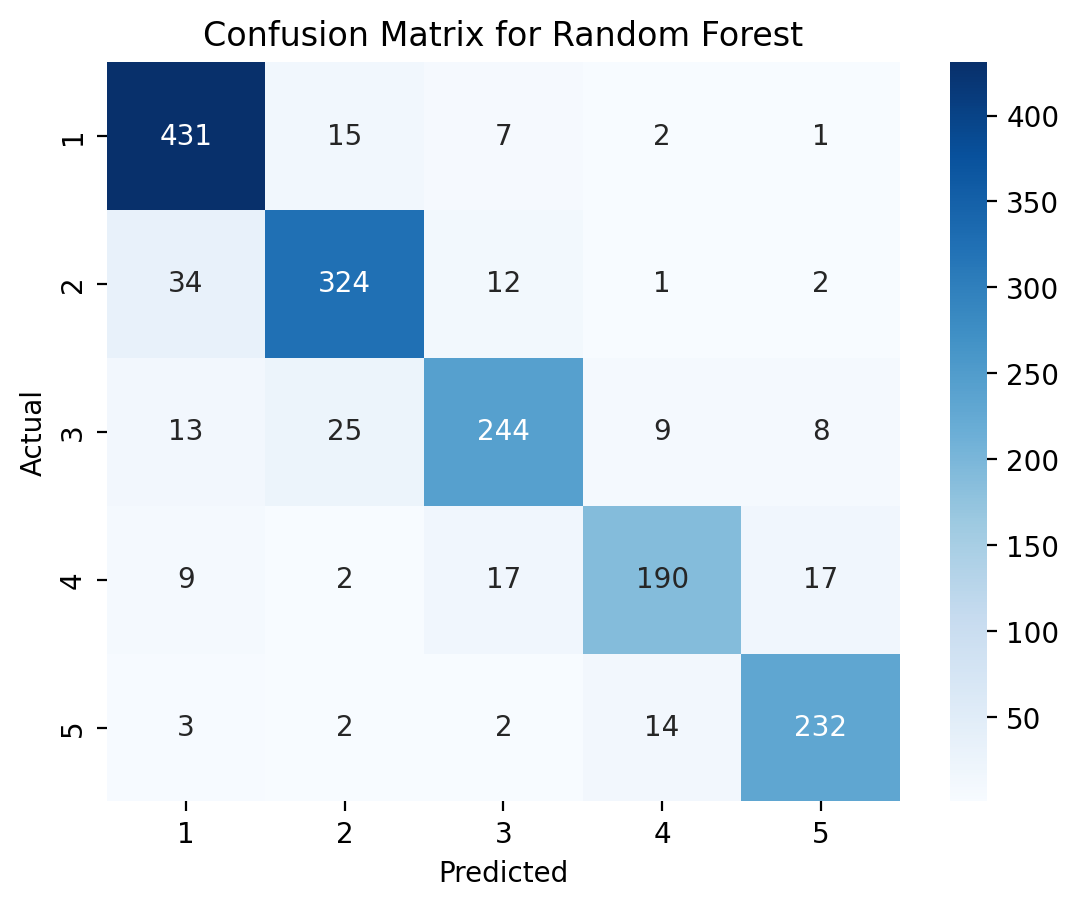

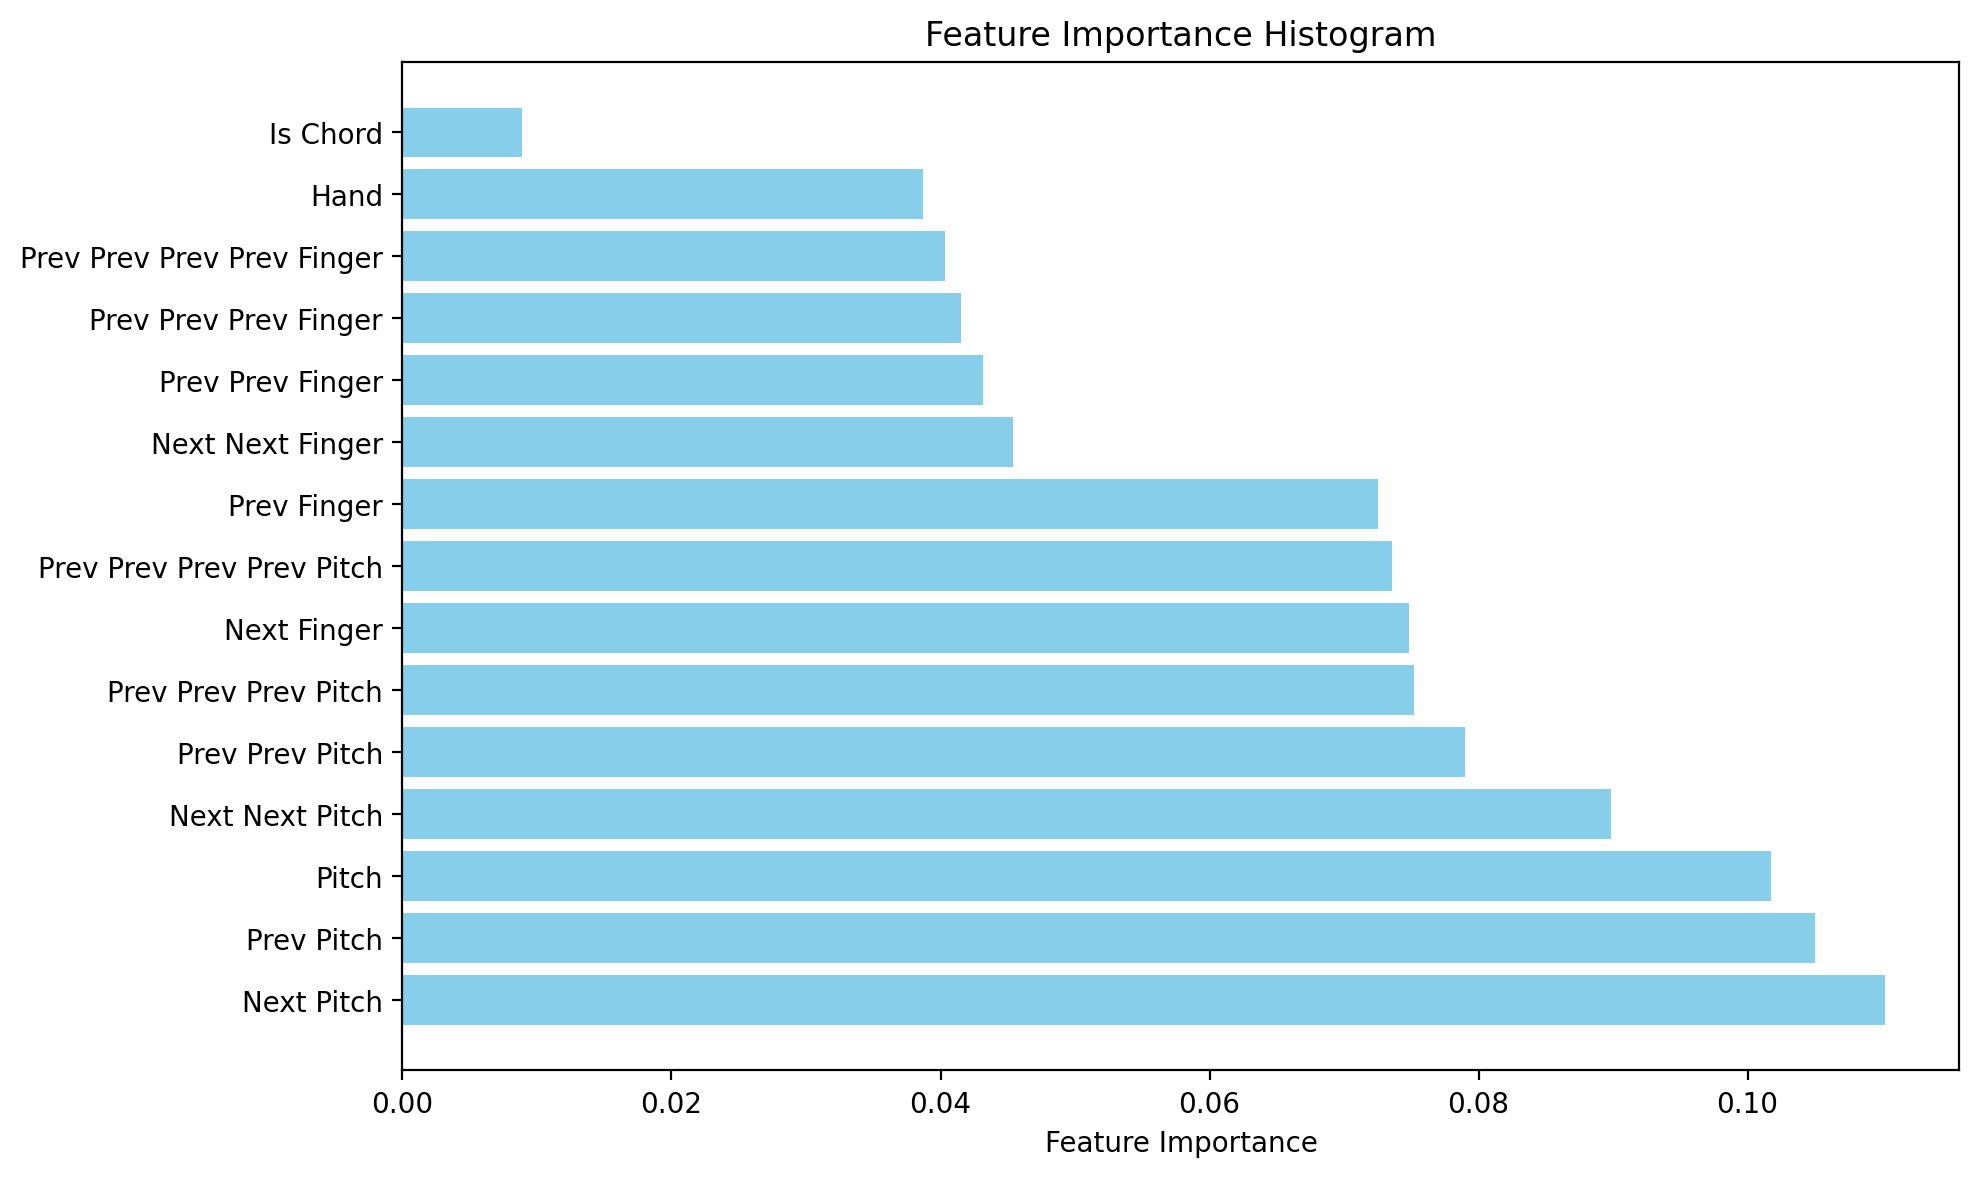

In [ ]:
# Initialize and train the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set and evaluate
train_accuracy = accuracy_score(y_train, rf.predict(X_train))
test_accuracy = accuracy_score(y_test, rf.predict(X_test))

# Accuracy
print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

# Feature importance
importances = rf.feature_importances_
feature_labels = [
    "Hand", "Pitch", "Is Chord",
    "Prev Pitch", "Prev Finger", "Prev Prev Pitch", "Prev Prev Finger",
    "Prev Prev Prev Pitch", "Prev Prev Prev Finger",
    "Prev Prev Prev Prev Pitch", "Prev Prev Prev Prev Finger",
    "Next Pitch", "Next Finger", "Next Next Pitch", "Next Next Finger"
]

# Create the confusion matrix
cm = confusion_matrix(y_test, rf.predict(X_test))
finger_labels = ['1', '2', '3', '4', '5']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=finger_labels, yticklabels=finger_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')

# Save the model to a file
joblib.dump(rf, 'rf_model.joblib')


# Sort the feature importances in descending order and arrange the labels accordingly
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_labels = np.array(feature_labels)[sorted_indices]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.barh(sorted_labels, sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Histogram')
plt.tight_layout()

# Display the plot
plt.show()

## RNN Model

 LSTM model might not be leveraging more features as effectively as RF, since it expects to learn them from raw sequences instead. So we only add 4 previous and 2 next notes.

### Data Preparation

In [ ]:
# Load CSV file
df = pd.read_csv('training.csv')

# Adding previous notes
df['prev_pitch'] = df.groupby(['title', 'hand'])['pitch'].shift(1).fillna(-1)
df['prev_pitch'] = df['pitch'] - df['prev_pitch']
df['prev_finger'] = df.groupby(['title', 'hand'])['finger'].shift(1).fillna(-1)

df['prev_prev_pitch'] = df.groupby(['title', 'hand'])['pitch'].shift(2).fillna(-1)
df['prev_prev_pitch'] = df['pitch'] - df['prev_prev_pitch']
df['prev_prev_finger'] = df.groupby(['title', 'hand'])['finger'].shift(2).fillna(-1)

df['prev_prev_prev_pitch'] = df.groupby(['title', 'hand'])['pitch'].shift(3).fillna(-1)
df['prev_prev_prev_pitch'] = df['pitch'] - df['prev_prev_prev_pitch']
df['prev_prev_prev_finger'] = df.groupby(['title', 'hand'])['finger'].shift(3).fillna(-1)

df['prev_prev_prev_prev_pitch'] = df.groupby(['title', 'hand'])['pitch'].shift(4).fillna(-1)
df['prev_prev_prev_prev_pitch'] = df['pitch'] - df['prev_prev_prev_prev_pitch']
df['prev_prev_prev_prev_finger'] = df.groupby(['title', 'hand'])['finger'].shift(4).fillna(-1)

# Adding next notes
df['next_pitch'] = df.groupby(['title', 'hand'])['pitch'].shift(-1).fillna(-1)
df['next_pitch'] = df['next_pitch'] - df['pitch']
df['next_finger'] = df.groupby(['title', 'hand'])['finger'].shift(-1).fillna(-1)

df['next_next_pitch'] = df.groupby(['title', 'hand'])['pitch'].shift(-2).fillna(-1)
df['next_next_pitch'] = df['next_next_pitch'] - df['pitch']
df['next_next_finger'] = df.groupby(['title', 'hand'])['finger'].shift(-2).fillna(-1)

# Features
data = df[[
    "hand", "pitch", "finger", "is_chord",
    "prev_pitch", "prev_finger", "prev_prev_pitch", "prev_prev_finger",
    "prev_prev_prev_pitch", "prev_prev_prev_finger",
    "prev_prev_prev_prev_pitch", "prev_prev_prev_prev_finger",
    "next_pitch", "next_finger", "next_next_pitch", "next_next_finger"
]]

# Separate features (X) and target (y)
X = data.drop('finger', axis=1).values
y = data['finger'].values

# Only fingered samples
data = data[data['finger'] > 0]

# Shuffle
data = data.sample(frac=1)

# Split the data into training and testing sets (90% training and 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape input for RNN (samples, sequence length, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

## RNN Training and Evaluation

Epoch [5/20], Loss: 1.3621
Epoch [10/20], Loss: 1.3440
Epoch [15/20], Loss: 1.3363
Epoch [20/20], Loss: 1.3304
Final Test Accuracy: 68.33%


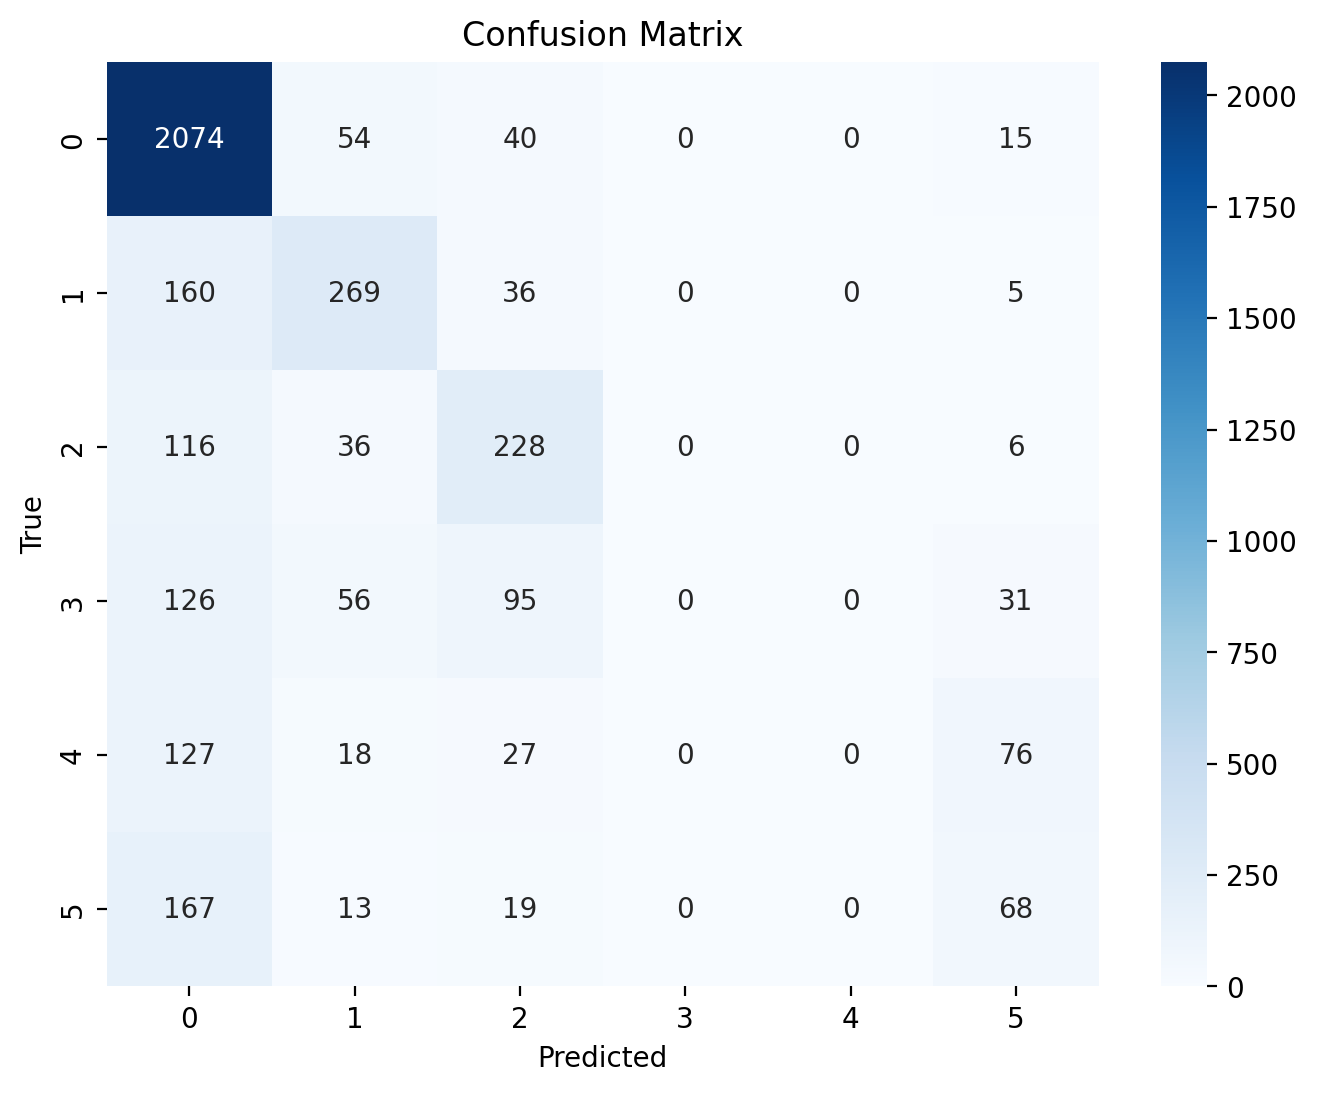

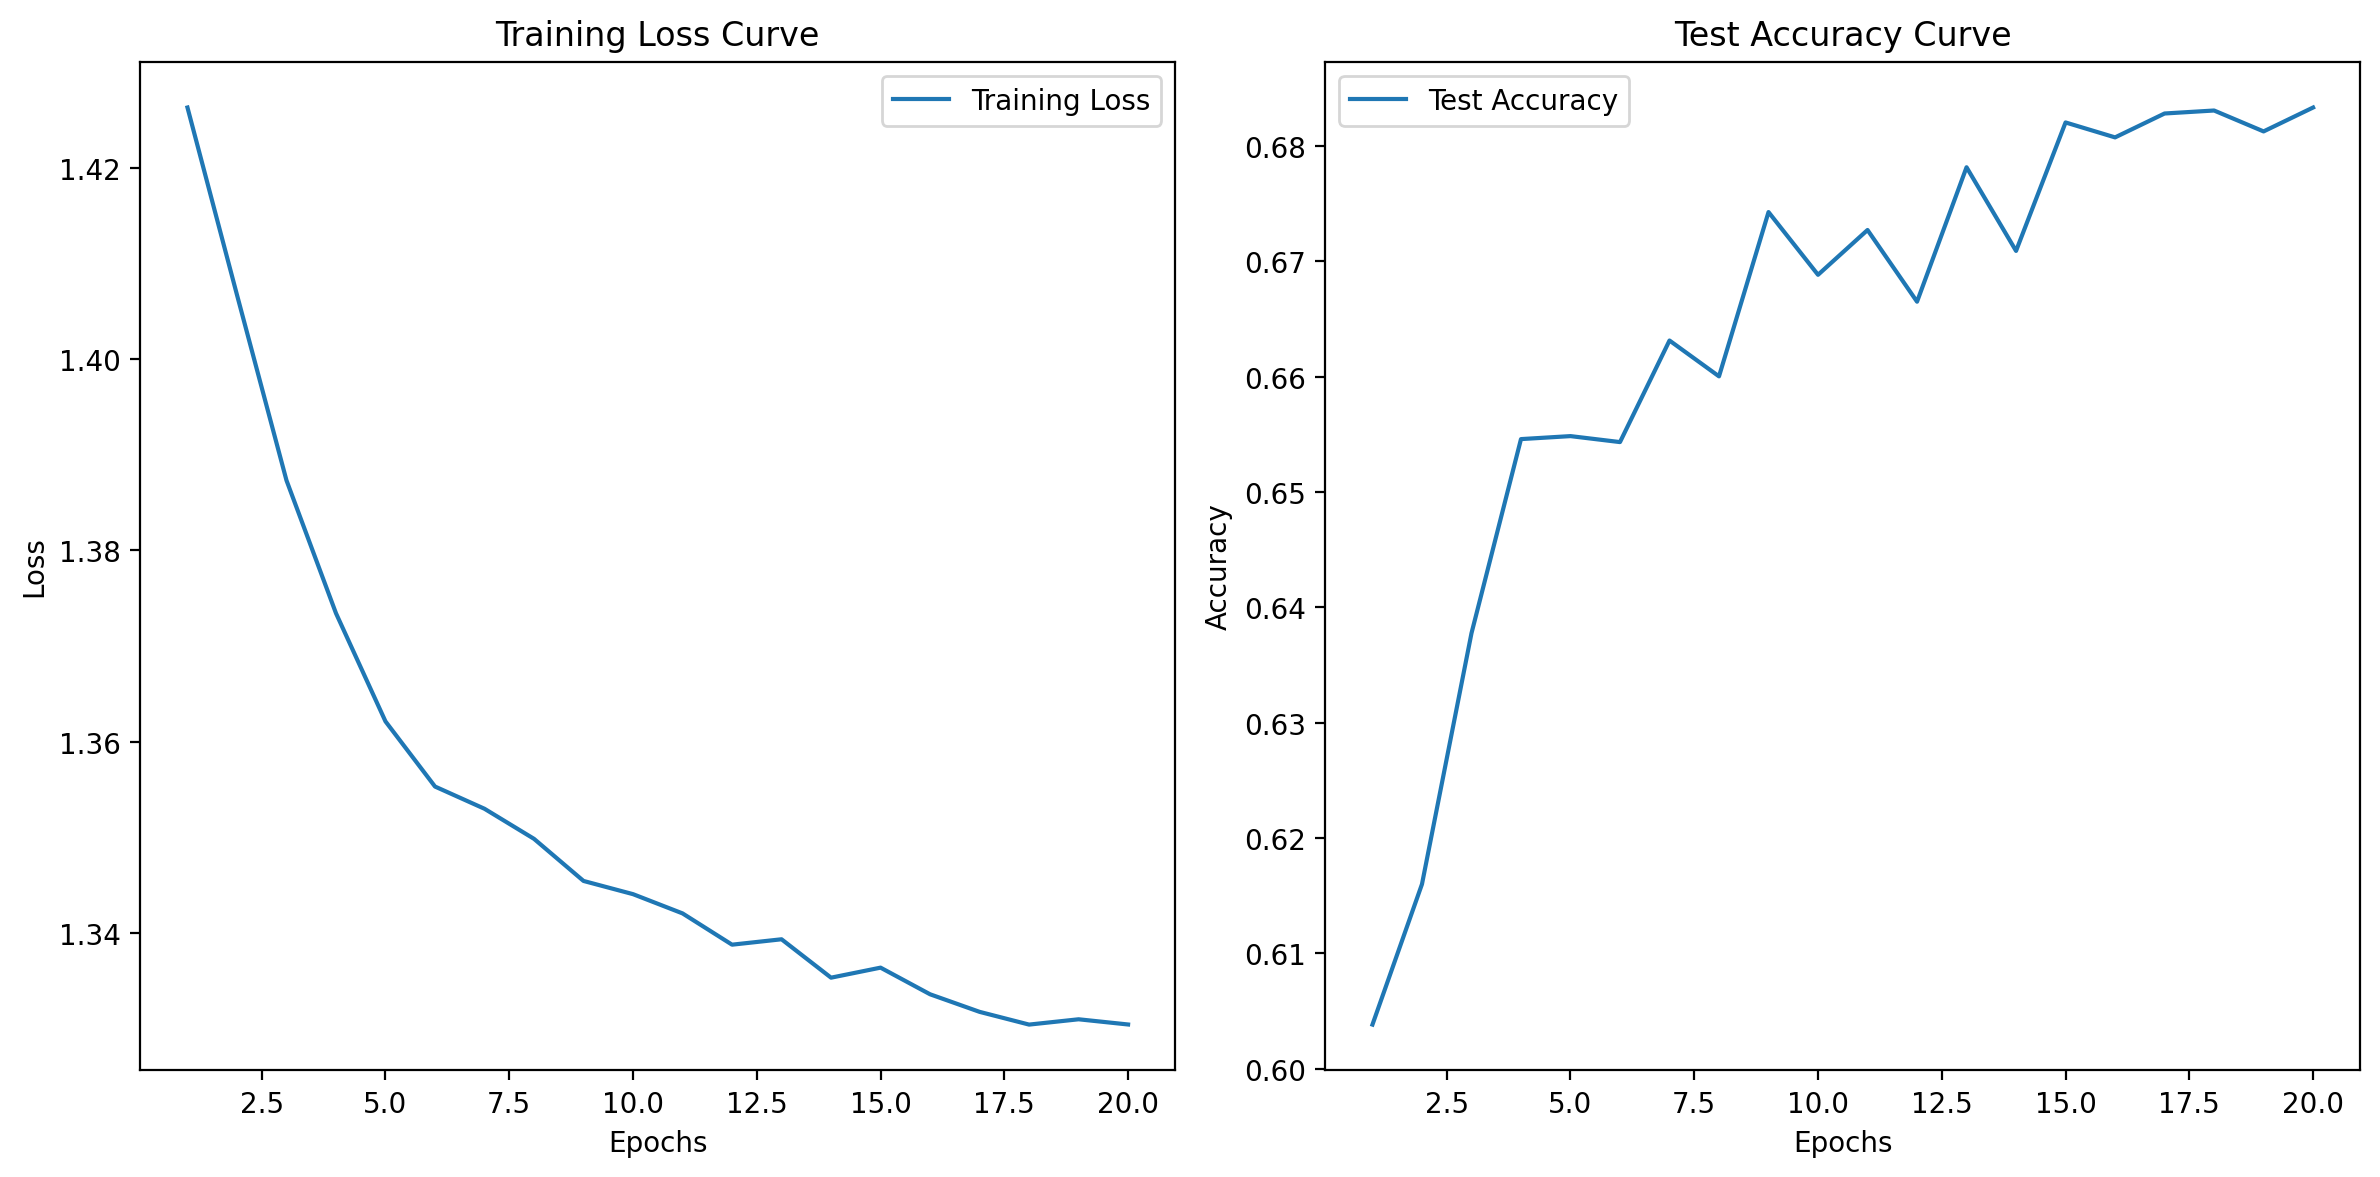

In [ ]:
# Define class weights (higher for fingers 2 and 3)
#weights = torch.tensor([1.0, 2.0, 2.0, 1.0, 1.0])

# Define the RNN model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = out[:, -1, :]
        out = self.fc(out)
        out = self.softmax(out)
        return out

# Model parameters
input_size = X_train.shape[2]
hidden_size = 128
output_size = len(np.unique(y))
batch_size = 30

# Initialize the model
model = RNN(input_size, hidden_size, output_size)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

# Create DataLoaders for batch processing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define loss function with class weights
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Track loss and accuracy
train_losses = []
test_accuracies = []

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    train_losses.append(epoch_loss / len(train_loader))

    if (epoch+1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss / len(train_loader):.4f}")

    # Evaluation with batch size 30
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            y_pred = model(X_batch)
            _, predicted = torch.max(y_pred, 1)
            correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)

    accuracy = correct / total
    test_accuracies.append(accuracy)

# Final test accuracy
print(f"Final Test Accuracy: {accuracy * 100:.2f}%")

# Generate Confusion Matrix
y_true = []
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        _, predicted = torch.max(y_pred, 1)
        y_true.extend(y_batch.cpu().numpy())
        y_pred_list.extend(predicted.cpu().numpy())

cm = confusion_matrix(y_true, y_pred_list)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot Training Loss and Test Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()



## LSTM

Epoch [5/20], Loss: 1.2960
Epoch [10/20], Loss: 1.2726
Epoch [15/20], Loss: 1.2569
Epoch [20/20], Loss: 1.2489
Final Test Accuracy: 75.14%


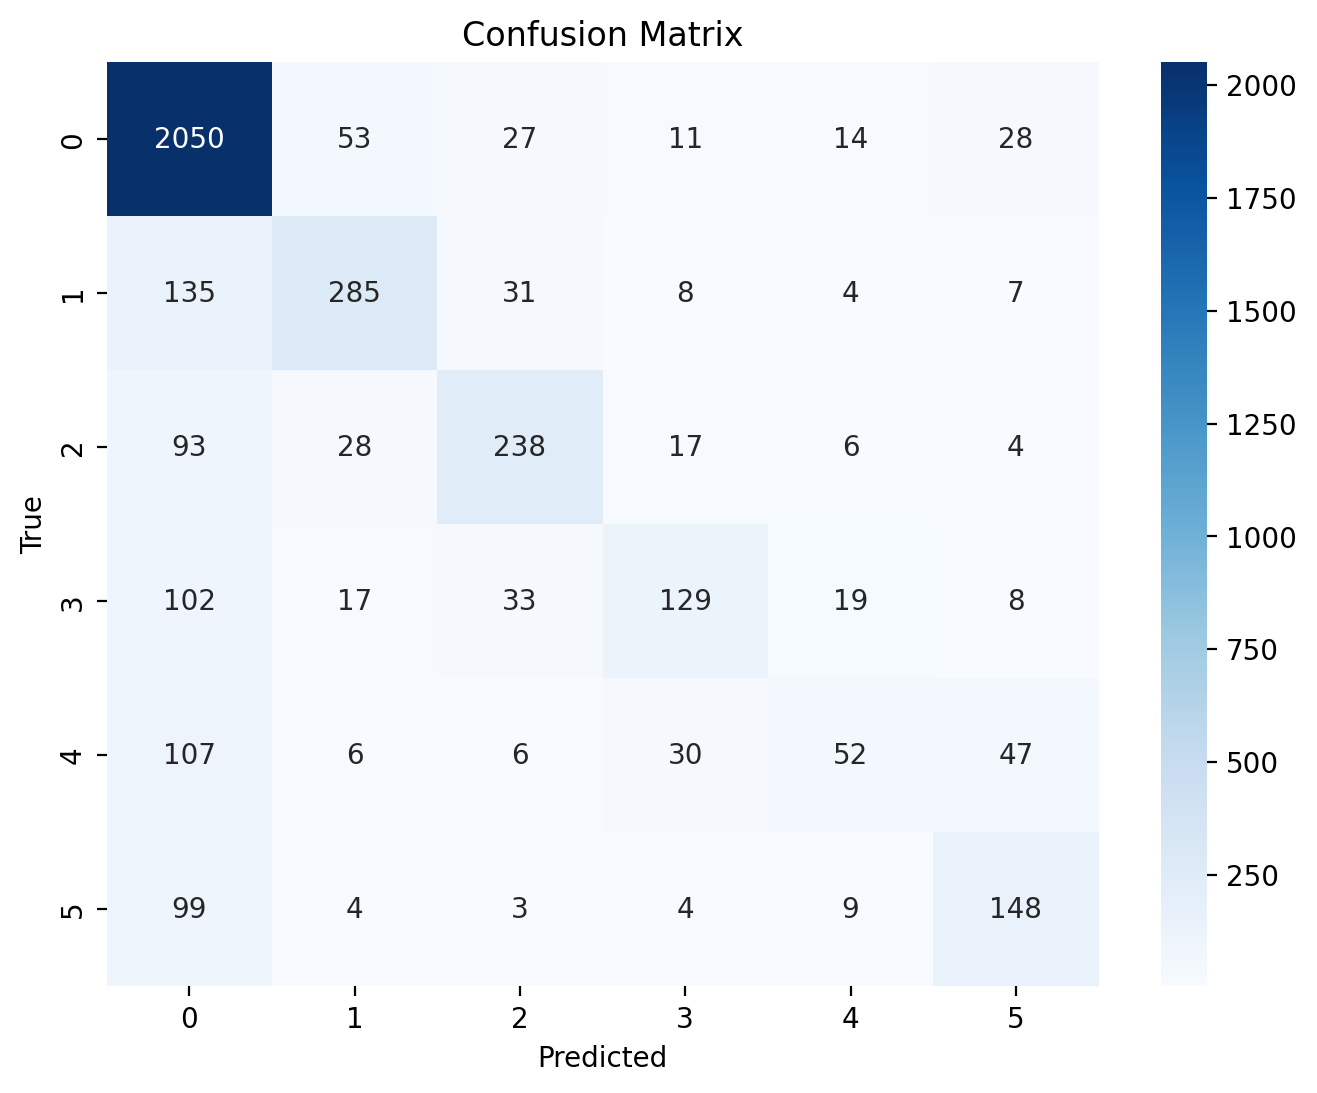

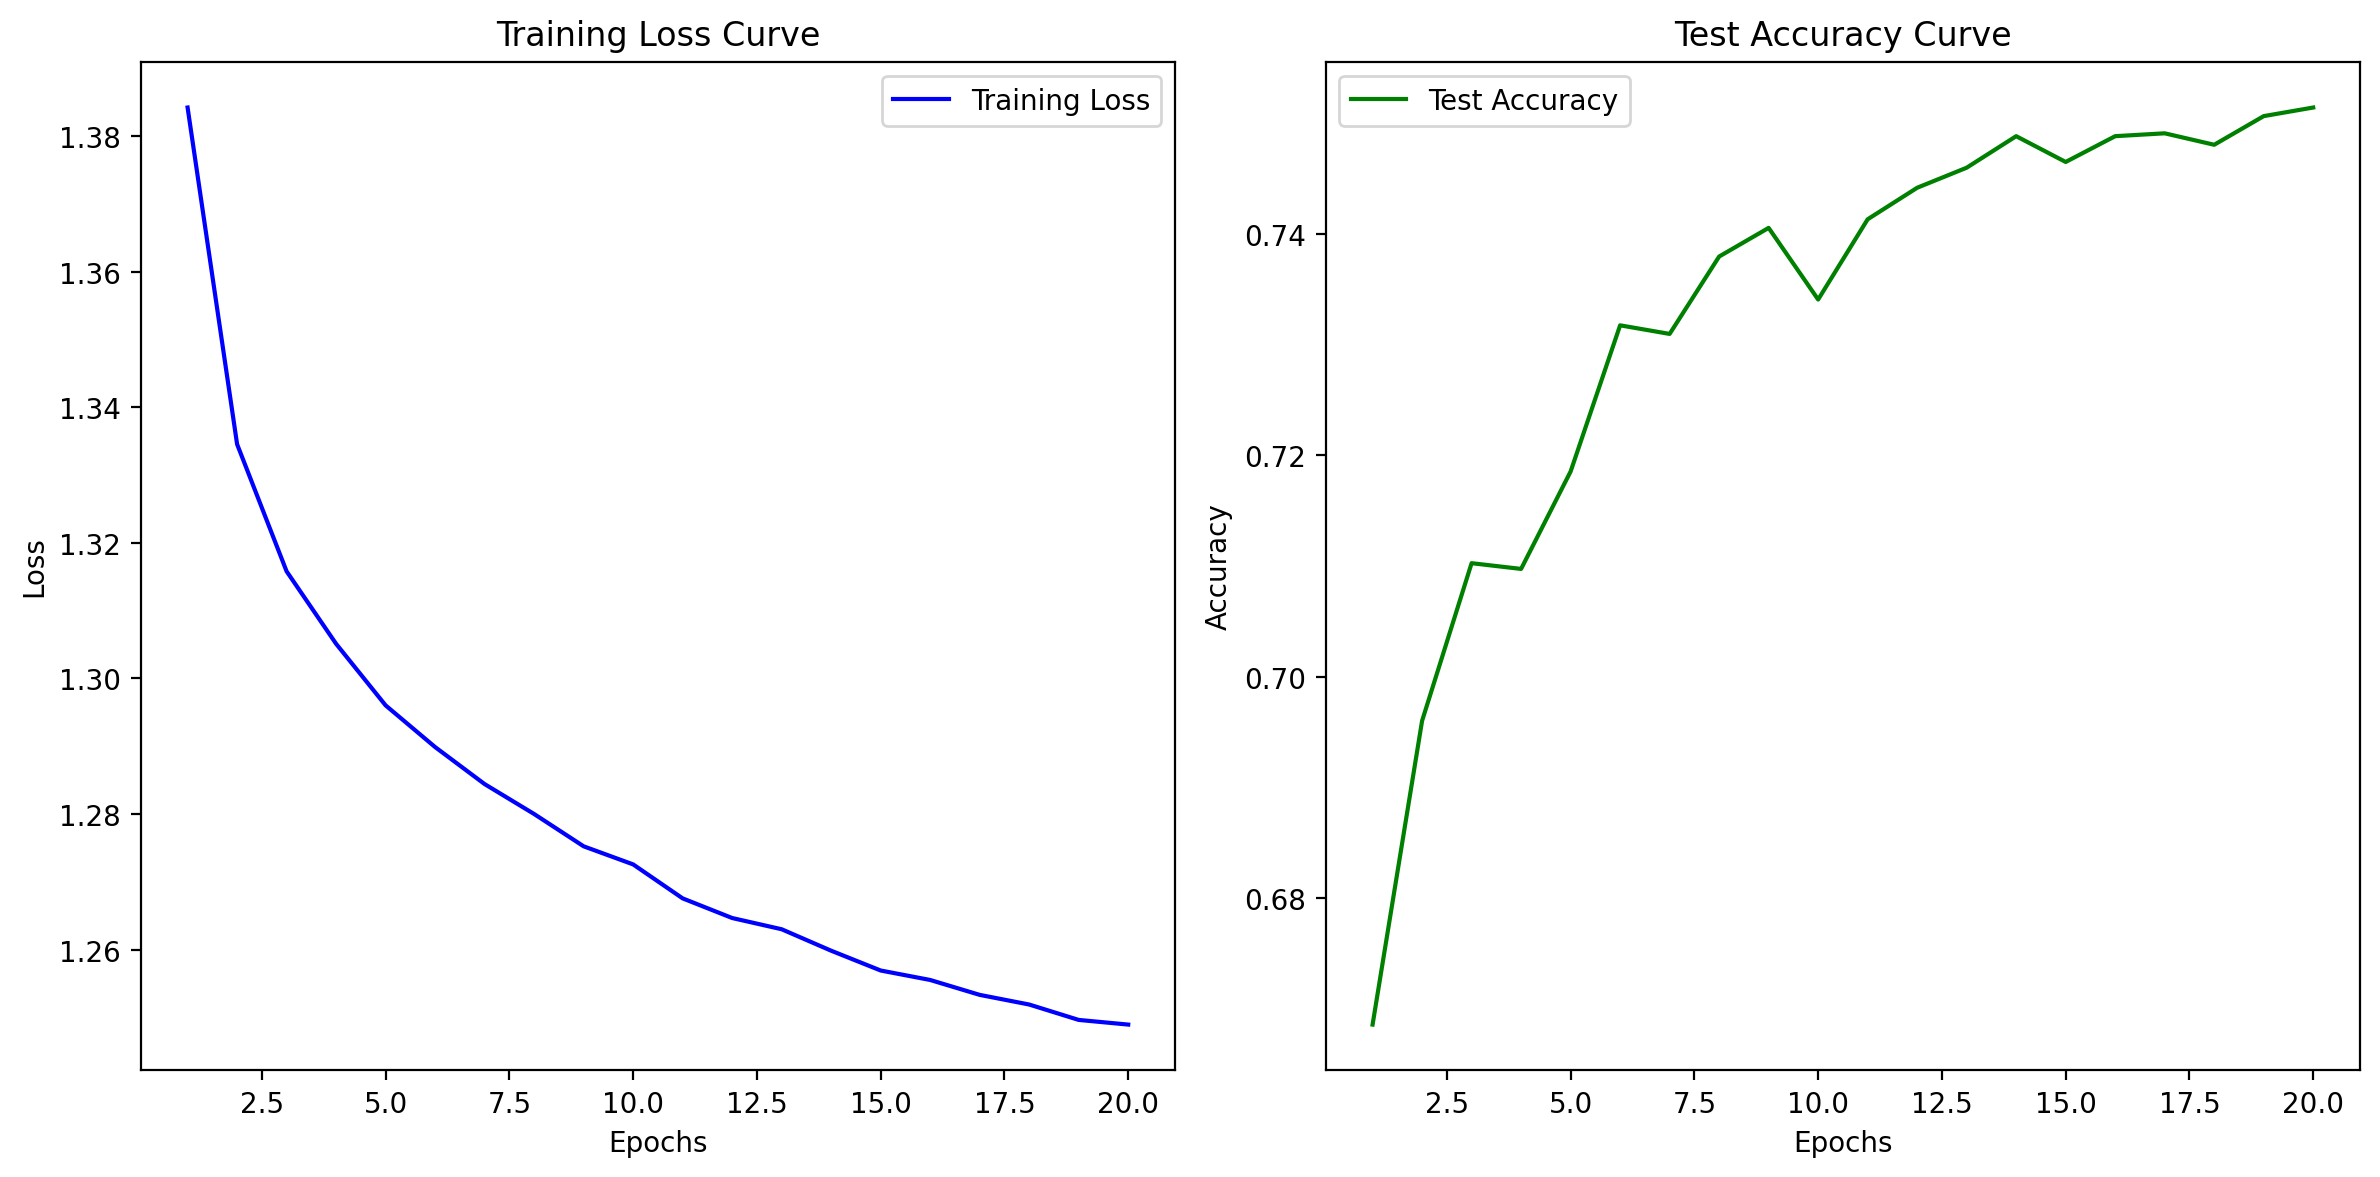

In [ ]:


# Define the LSTM model
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.fc(lstm_out[:, -1, :])  # Last time step output
        out = self.softmax(out)
        return out

# Model parameters
input_size = X_train.shape[2]
hidden_size = 128
output_size = len(np.unique(y))
batch_size = 30

# Initialize the model
model = LSTM(input_size, hidden_size, output_size)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

# Create DataLoaders for batch processing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define loss function and optimizer (no weights)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Track loss and accuracy
train_losses = []
test_accuracies = []

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    train_losses.append(epoch_loss / len(train_loader))

    if (epoch+1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss / len(train_loader):.4f}")

    # Evaluation with batch size 30
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            y_pred = model(X_batch)
            _, predicted = torch.max(y_pred, 1)
            correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)

    accuracy = correct / total
    test_accuracies.append(accuracy)

# Final test accuracy
print(f"Final Test Accuracy: {accuracy * 100:.2f}%")

# Generate Confusion Matrix
y_true = []
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        _, predicted = torch.max(y_pred, 1)
        y_true.extend(y_batch.cpu().numpy())
        y_pred_list.extend(predicted.cpu().numpy())

cm = confusion_matrix(y_true, y_pred_list)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot Training Loss and Test Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, color='b', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), test_accuracies, color='g', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()



Epoch 1: Loss = 1.5792, Test Accuracy = 0.2611
Epoch 2: Loss = 1.5384, Test Accuracy = 0.3227
Epoch 3: Loss = 1.3538, Test Accuracy = 0.4317
Epoch 4: Loss = 1.2677, Test Accuracy = 0.4550
Epoch 5: Loss = 1.2213, Test Accuracy = 0.4692
Epoch 6: Loss = 1.1946, Test Accuracy = 0.4563
Epoch 7: Loss = 1.1544, Test Accuracy = 0.4809
Epoch 8: Loss = 1.1227, Test Accuracy = 0.4815
Epoch 9: Loss = 1.0691, Test Accuracy = 0.4988
Epoch 10: Loss = 1.0159, Test Accuracy = 0.5172
Epoch 11: Loss = 0.9526, Test Accuracy = 0.5222
Epoch 12: Loss = 0.8794, Test Accuracy = 0.5413
Epoch 13: Loss = 0.7981, Test Accuracy = 0.5659
Epoch 14: Loss = 0.7194, Test Accuracy = 0.5825
Epoch 15: Loss = 0.6409, Test Accuracy = 0.5881
Epoch 16: Loss = 0.5662, Test Accuracy = 0.6102
Epoch 17: Loss = 0.4985, Test Accuracy = 0.6090
Epoch 18: Loss = 0.4419, Test Accuracy = 0.6404
Epoch 19: Loss = 0.4005, Test Accuracy = 0.6484
Epoch 20: Loss = 0.3496, Test Accuracy = 0.6478
Epoch 21: Loss = 0.3177, Test Accuracy = 0.6342
E

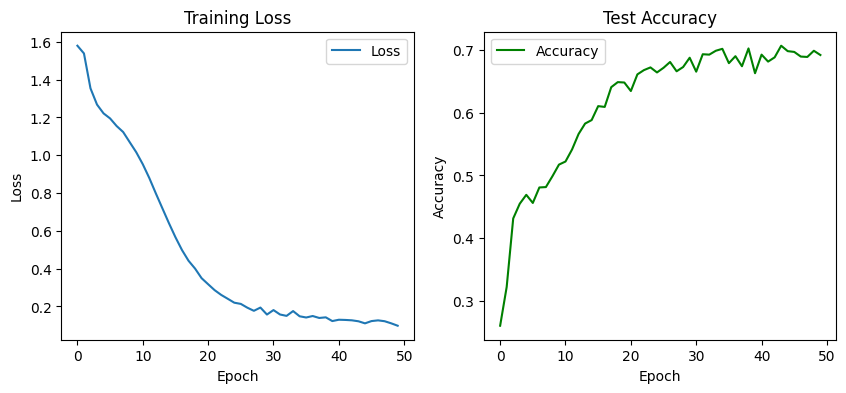

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset, random_split

# Define the dataset class
class PianoFingeringDataset(Dataset):
    def __init__(self, df, seq_length=10):
        self.seq_length = seq_length
        self.features = df[['pitch', 'is_chord', 'is_rest', 'hand']].values.astype(np.float32)
        self.targets = df['finger'].values.astype(np.int64)

    def __len__(self):
        return len(self.features) - self.seq_length

    def __getitem__(self, idx):
        x = self.features[idx:idx + self.seq_length]
        y = self.targets[idx + self.seq_length - 1]  # Predict the last element's finger
        return torch.tensor(x), torch.tensor(y)

# Define the RNN model
class RNNFingerClassifier(nn.Module):
    def __init__(self, input_size=4, hidden_size=128, num_layers=4, output_size=5):
        super(RNNFingerClassifier, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, (hn, _) = self.lstm(x)  # Take the last hidden state
        out = self.fc(hn[-1])  # Use the last layer's hidden state
        return out

# Custom masked loss function
def masked_loss(output, target, criterion):
    mask = target > 0  # Ignore cases where target == 0
    target = target - 1  # Shift range [1-5] → [0-4] for CrossEntropyLoss
    loss = criterion(output[mask], target[mask])
    return loss

# Function to compute accuracy
def compute_accuracy(model, dataloader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            output = model(x)
            predictions = torch.argmax(output, dim=1) + 1  # Shift [0-4] back to [1-5]
            mask = y > 0  # Ignore unknown fingers (0)
            correct += (predictions[mask] == y[mask]).sum().item()
            total += mask.sum().item()
    return correct / total if total > 0 else 0

# Training function
def train(model, train_loader, test_loader, criterion, optimizer, epochs=10):
    train_losses, test_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        total_loss = 0

        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            output = model(x)
            loss = masked_loss(output, y, criterion)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        # Compute test accuracy
        test_acc = compute_accuracy(model, test_loader)
        train_losses.append(total_loss / len(train_loader))
        test_accuracies.append(test_acc)

        print(f"Epoch {epoch+1}: Loss = {train_losses[-1]:.4f}, Test Accuracy = {test_acc:.4f}")

    # Plot loss and accuracy
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(test_accuracies, label="Accuracy", color='green')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Test Accuracy")
    plt.legend()

    plt.show()

# Load dataset
df = pd.read_csv("training.csv")

# Normalize pitch
df['pitch'] = (df['pitch'] - df['pitch'].mean()) / df['pitch'].std()

# Split into train and test sets (90% / 10%)
dataset = PianoFingeringDataset(df)
train_size = int(0.9 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Model setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RNNFingerClassifier().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train model
train(model, train_loader, test_loader, criterion, optimizer, epochs=50)


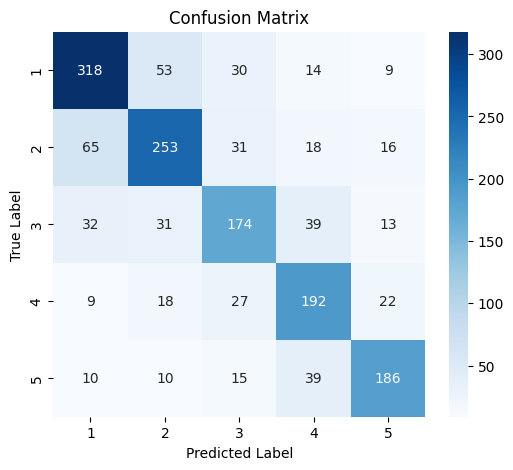

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to compute test predictions
def evaluate_model(model, test_loader):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.to(device), y.to(device)
            output = model(x)
            preds = torch.argmax(output, dim=1) + 1  # Shift [0-4] back to [1-5]
            mask = y > 0  # Ignore unknown labels
            all_preds.extend(preds[mask].cpu().numpy())
            all_labels.extend(y[mask].cpu().numpy())

    return np.array(all_labels), np.array(all_preds)

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=[1, 2, 3, 4, 5])
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

# After training, compute accuracy and confusion matrix
y_true, y_pred = evaluate_model(model, test_loader)
plot_confusion_matrix(y_true, y_pred)


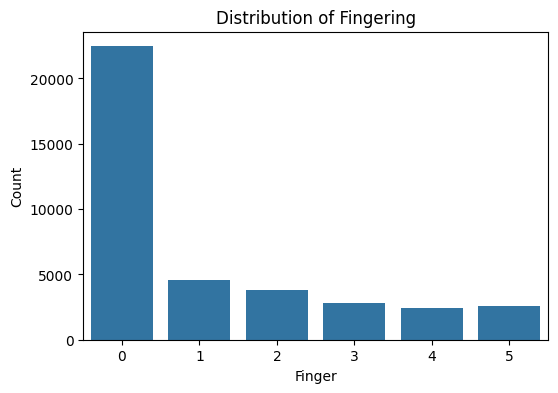

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("training.csv")
# Only fingered samples
#df = df[df['finger'] > 0]

# Assuming df is your dataset
plt.figure(figsize=(6, 4))
sns.countplot(x="finger", data=df)
plt.title("Distribution of Fingering")
plt.xlabel("Finger")
plt.ylabel("Count")
plt.show()

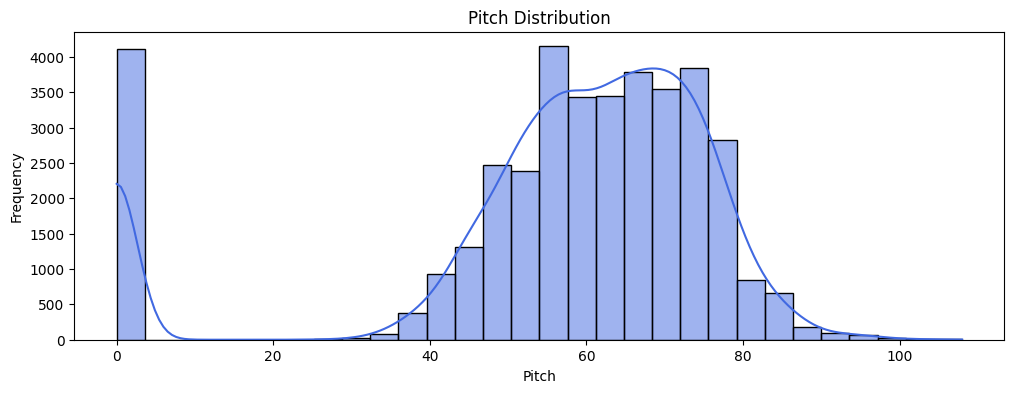

In [ ]:
plt.figure(figsize=(12, 4))
sns.histplot(df["pitch"], bins=30, kde=True, color="royalblue")
plt.title("Pitch Distribution")
plt.xlabel("Pitch")
plt.ylabel("Frequency")
plt.show()

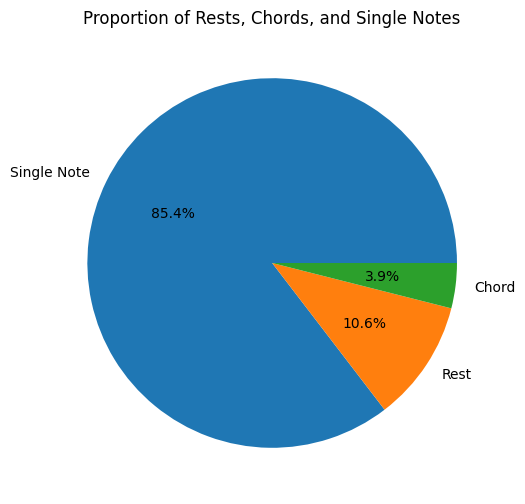

In [ ]:
# Categorize each row
df["note_type"] = df.apply(
    lambda row: "Rest" if row["is_rest"]
    else "Chord" if row["is_chord"]
    else "Single Note", axis=1
)

# Count occurrences
note_counts = df["note_type"].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
note_counts.plot(kind="pie", autopct="%1.1f%%")
plt.title("Proportion of Rests, Chords, and Single Notes")
plt.ylabel("")  # Hide ylabel for cleaner visualization
plt.show()

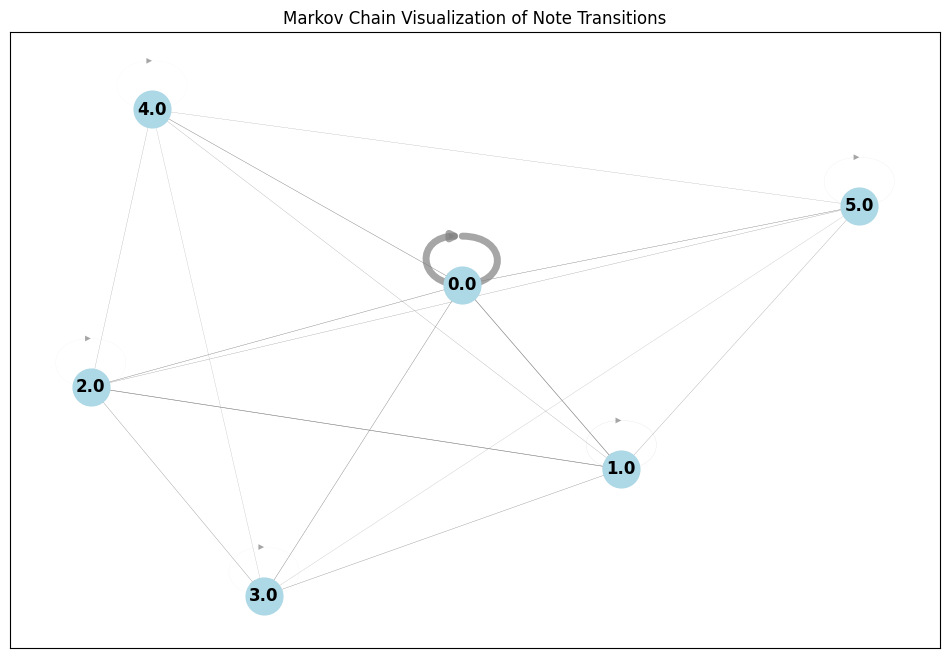

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Create transitions (assuming df is sorted by time)
df["next_finger"] = df["finger"].shift(-1)

# Remove NaN values (last note has no next note)
transitions = df.dropna(subset=["next_finger"])

# Step 2: Count transitions
transition_counts = transitions.groupby(["finger", "next_finger"]).size().reset_index(name="count")

# Step 3: Create a directed graph
G = nx.DiGraph()

# Add edges with weights
for _, row in transition_counts.iterrows():
    G.add_edge(row["finger"], row["next_finger"], weight=row["count"])

# Step 4: Draw the network
plt.figure(figsize=(12, 8))

# Define node positions using a spring layout
pos = nx.spring_layout(G, k=1.5)  # k controls node spacing

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="lightblue")

# Draw edges with width proportional to transition count
edges = [(u, v) for u, v in G.edges()]
weights = [G[u][v]["weight"] for u, v in edges]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[w / max(weights) * 5 for w in weights], alpha=0.7, edge_color="gray", arrows=True)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")

plt.title("Markov Chain Visualization of Note Transitions")
plt.show()


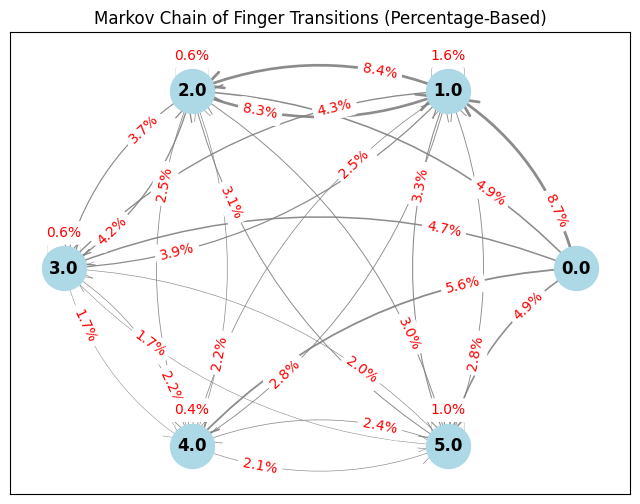

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_csv("training.csv")
# Only fingered samples

# Assuming df has a "finger" column (values 1-5 for each hand)
df["next_finger"] = df["finger"].shift(-1)

# Drop 0 to 0 transitions
df = df[df['next_finger'] > 0]

# Remove NaN values (last note has no next note)
transitions = df.dropna(subset=["next_finger"])

# Count transitions
transition_counts = transitions.groupby(["finger", "next_finger"]).size().reset_index(name="count")

# Convert counts to percentages
total_transitions = transition_counts["count"].sum()
transition_counts["percent"] = transition_counts["count"] / total_transitions * 100

# Create a directed graph
G = nx.DiGraph()

# Add edges with weights (percentage)
for _, row in transition_counts.iterrows():
    G.add_edge(row["finger"], row["next_finger"], weight=row["percent"], label=f"{row['percent']:.1f}%")

# Draw the graph
plt.figure(figsize=(8, 6))

# Define node positions using a circular layout for clarity
pos = nx.circular_layout(G)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color="lightblue")

# Draw edges with arrows
edges = [(u, v) for u, v in G.edges()]
weights = [G[u][v]["weight"] for u, v in edges]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[w / max(weights) * 2 for w in weights], alpha=0.9,
                       edge_color="gray", arrows=True, arrowstyle="->", arrowsize=30, connectionstyle="arc3,rad=0.2")

# Draw labels on nodes
nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")

# Add edge labels (percentages)
edge_labels = {(u, v): G[u][v]["label"] for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color="red", label_pos = 0.25, connectionstyle="arc3,rad=0.2")

plt.title("Markov Chain of Finger Transitions (Percentage-Based)")
plt.show()


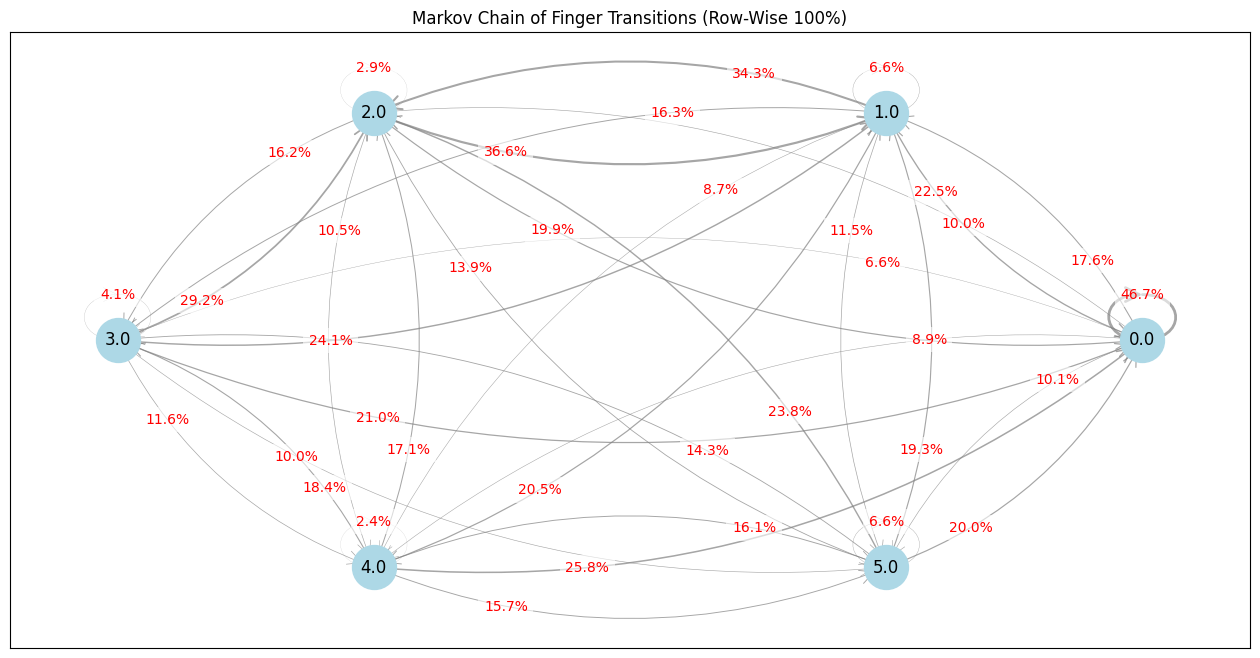

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Sample Data: Assuming df has a "finger" column (values 1-5 for each hand)
df["next_finger"] = df["finger"].shift(-1)

# Remove NaN values (last note has no next note)
transitions = df.dropna(subset=["next_finger"])

# Count transitions
transition_counts = transitions.groupby(["finger", "next_finger"]).size().reset_index(name="count")

# Normalize within each row (starting finger)
transition_counts["percent"] = transition_counts.groupby("finger")["count"].transform(lambda x: x / x.sum() * 100)

# Create a directed graph
G = nx.DiGraph()

# Add edges with normalized weights (percentage)
for _, row in transition_counts.iterrows():
    G.add_edge(row["finger"], row["next_finger"], weight=row["percent"], label=f"{row['percent']:.1f}%")

# Draw the graph
plt.figure(figsize=(16, 8))

# Define node positions using a circular layout for clarity
pos = nx.circular_layout(G)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color="lightblue")

# Draw curved edges
edges = [(u, v) for u, v in G.edges()]
weights = [G[u][v]["weight"] for u, v in edges]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[w / max(weights) * 2 for w in weights], alpha=0.7,
                       edge_color="gray", arrows=True, arrowstyle="->", arrowsize=25,
                       connectionstyle="arc3,rad=0.2")  # Curved edges

# Draw labels on nodes
nx.draw_networkx_labels(G, pos, font_size=12)

# Add correctly positioned edge labels
edge_labels = {(u, v): G[u][v]["label"] for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color="red",
                             label_pos=0.25, rotate=False, bbox=dict(facecolor="white", alpha=0.6, edgecolor="none"),
                       connectionstyle="arc3,rad=0.2")

plt.title("Markov Chain of Finger Transitions (Row-Wise 100%)")
plt.show()


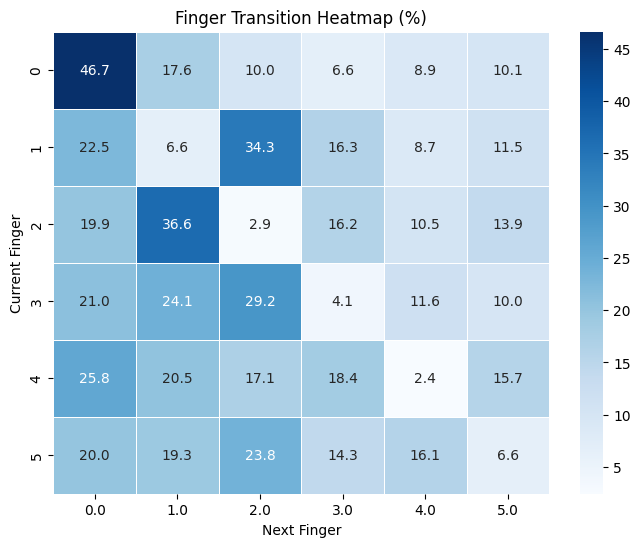

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df has a "finger" column (values 1-5 for each hand)
df["next_finger"] = df["finger"].shift(-1)

# Remove NaN values (last note has no next note)
transitions = df.dropna(subset=["next_finger"])

# Count transitions
transition_counts = transitions.groupby(["finger", "next_finger"]).size().unstack(fill_value=0)

# Convert counts to percentages
transition_matrix = transition_counts.div(transition_counts.sum(axis=1), axis=0) * 100  # Normalize row-wise

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(transition_matrix, annot=True, cmap="Blues", fmt=".1f", linewidths=0.5)

plt.title("Finger Transition Heatmap (%)")
plt.xlabel("Next Finger")
plt.ylabel("Current Finger")
plt.show()
